<a href="https://colab.research.google.com/github/mb1te/cm/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 2**

**ИНТЕРПОЛЯЦИОННЫЙ МНОГОЧЛЕН В ФОРМАХ ЛАГРАНЖА И НЬЮТОНА**


1.1. Произвольно выбрать 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1 и построить интерполяционный многочлен Лагранжа. Какой степени многочлен будет построен?

Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Вычисление значений функции многочленом Лагранжа:


In [ ]:
def get_lagrange_value(x, y, t):
  n = len(x)
  ans = 0
  for i in range(n):
    nom, den = 1, 1
    for j in range(n):
      if i != j:
        nom *= t - x[j]
        den *= x[i] - x[j]
    ans += y[i] * nom / den
  return ans

Генерация пяти случайных точек

In [ ]:
gen_x = np.random.uniform(-1, 1, 5)
gen_y = np.random.uniform(0, 1, 5)
print("x: ", gen_x, "\ny: ", gen_y)

x:  [-0.4474504   0.78599933  0.65764923  0.53761158  0.91703352] 
y:  [0.80106523 0.07461706 0.43283029 0.77274173 0.02939226]


Построение по ним многочлена Лагранжа и вывод графика

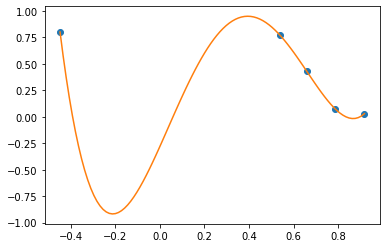

In [ ]:
x_coords = np.linspace(np.min(gen_x), np.max(gen_x), 100)
y_coords = [get_lagrange_value(gen_x, gen_y, i) for i in x_coords]
plt.plot(gen_x, gen_y, 'o', x_coords, y_coords)
plt.show()

Построен многочлен Лагранжа 4 степени, в заданных узлах его значения совпадают с исходными

1.2 Аппроксимировать заданную функцию f(x) многочленом $L_n(x)$,
$f(x) = \frac{1}{1+7x^2}, x \in [-1,1]$;

а) равномерное разбиение при $n = 4; 10; 20;$ при этом $x_i=-1+ih$, $h=\frac{2}{n}$, $i = \overline{0, n}$.

n =  4


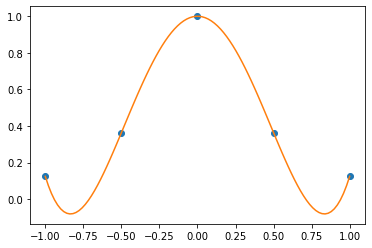

n =  10


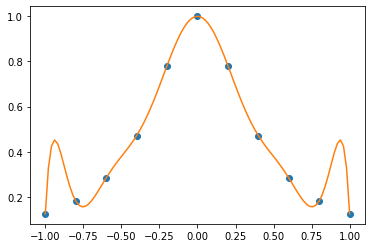

n =  20


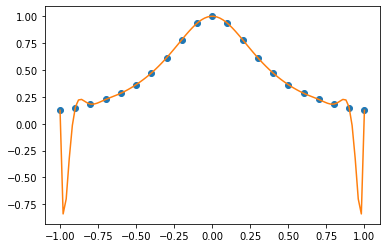

In [ ]:
def f(x):
  return 1 / (1 + 7 * x * x)
for n in [4, 10, 20]:
  print("n = ", n)
  h = 2 / n
  x = np.array([(-1 + i * h) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]
  plt.plot(x, y, 'o', x_coords, y_coords)
  plt.show()



б) узлы интерполяции - нули многочлена Чебышева 1-го рода $T_{n+1}(x)$:

$x_i=\cos\left(\frac{(2i+1)\pi}{N}\right), N = 2 (n+1), i= \overline{0, n}$

n =  4


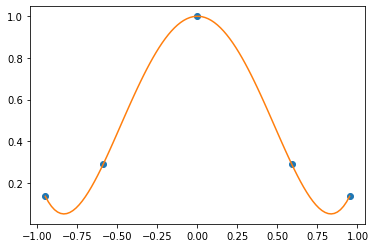

n =  10


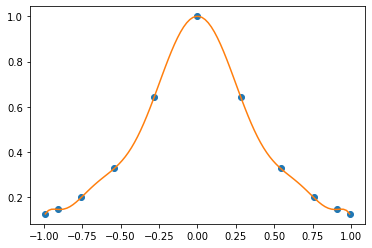

n =  20


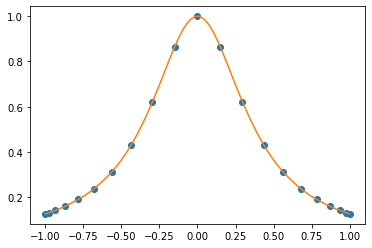

In [ ]:
def get_x(i, N):
  return np.cos((2 * i + 1) * np.pi / N)
for n in [4, 10, 20]:
  print("n = ", n)
  N = 2 * (n + 1)
  x = np.array(get_x(i, N) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]
  plt.plot(x, y, 'o', x_coords, y_coords)
  plt.show()

$\textbf{Задание 2.}$ Используя графическое представление $L_n(x)$ на $[a,b]$, исследовать сходимость интерполяционного процесса для заданной функции.

n =  4


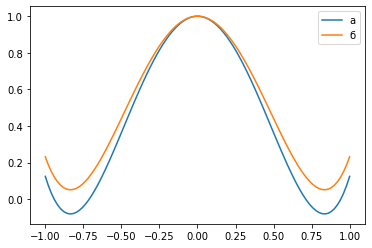

n =  10


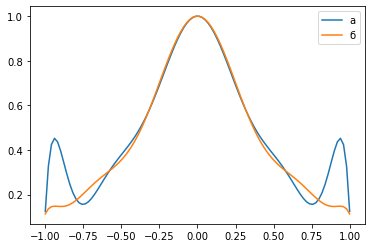

n =  20


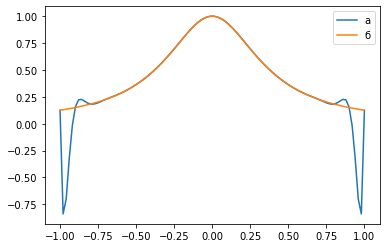

In [ ]:
for n in [4, 10, 20]:
  print("n = ", n)
  h = 2 / n
  x1 = np.array([(-1 + i * h) for i in range(n + 1)])
  y1 = np.array([f(x1[i]) for i in range(n + 1)])
  x_coords1 = np.linspace(-1, 1, 100)
  y_coords1 = [get_lagrange_value(x1, y1, i) for i in x_coords1]

  N = 2 * (n + 1)
  x2 = np.array([get_x(i, N) for i in range(n + 1)])
  y2 = np.array([f(x2[i]) for i in range(n + 1)])
  x_coords2 = np.linspace(-1, 1, 100)
  y_coords2 = [get_lagrange_value(x2, y2, i) for i in x_coords2]
  plt.plot(x_coords1, y_coords1, label='а')
  plt.plot(x_coords2, y_coords2, label='б')
  plt.legend()
  plt.show()

3.1) Произвольно выбрать те же 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1, что и в первом задании, построить интерполяционный многочлен Ньютона и убедиться, что он идентичен многочлену Лагранжа.

In [ ]:
def get_newton_value(x, y, i):
  
  